# Vehicle Price Exploration And Prediction 
## by **SALMAN FARI**

# Introduction
This dataset contains information about used cars.
This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.

# The Dataset
The columns in the given dataset are as follows:

<li> name
<li> year
<li> selling_price
<li> km_driven
<li> fuel
<li> seller_type
<li> Transmission
<li> Owner

You can download the dataset from [Kaggle](https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho).

# Loading Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns

In [2]:
df = pd.read_csv('Car details v3.csv')
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


# Assessing Data
## Visual Assessment 

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


## Programmatic Assessment 

In [4]:
#check for dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        7907 non-null   object 
 9   engine         7907 non-null   object 
 10  max_power      7913 non-null   object 
 11  torque         7906 non-null   object 
 12  seats          7907 non-null   float64
dtypes: float64(1), int64(3), object(9)
memory usage: 825.6+ KB


In [5]:
#To display four digit in float numbers
pd.options.display.float_format = '{:.4f}'.format

In [6]:
#check for descriptive information of the selling_price column
df.selling_price.describe()

count       8128.0000
mean      638271.8077
std       806253.4035
min        29999.0000
25%       254999.0000
50%       450000.0000
75%       675000.0000
max     10000000.0000
Name: selling_price, dtype: float64

In [7]:
#check for missing values
df.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [8]:
#check for duplicated values
df.duplicated().sum()

1202

# Data Cleaning
### Quality Issues
<li> There are missing values
<li> There are duplicated values
<li> The names in name column are too long
<li> fuel, seller_type, transmission, owner is not in categorical format
<li> mileage has two different units
<li> engine column has its unit in the values (CC)
<li> max_power column has its unit in the values (bhp)</li>

### Tidy Issues
<li> Torque column has different units

In [9]:
#make a copy of the dataset
df_clean = df.copy()

# Cleaning Quality Issues

## Q1: There are missing values

### Define
Drop missing rows

### Code

In [10]:
#drop all missing rows
df_clean.dropna(inplace=True)

### Test

In [11]:
#check for missing values
df_clean.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

## Q2: There are duplicated values
### Define
Drop duplicate rows

### Code

In [12]:
#drop all duplicate rows
df_clean.drop_duplicates(inplace=True)

### Test

In [13]:
#check for duplicate rows
df_clean.duplicated().sum()

0

## Q3: The names in name column are too long
### Define
Slice the name into 3 words

### Code

In [14]:
#change name column to 3 words name
df_clean.name = df_clean.name.str.split().str.slice(0,3).str.join(' ')

### Test

In [15]:
#check name column
df_clean.name

0         Maruti Swift Dzire
1            Skoda Rapid 1.5
2       Honda City 2017-2020
3         Hyundai i20 Sportz
4           Maruti Swift VXI
                ...         
8121          Maruti Wagon R
8122       Hyundai i20 Magna
8123       Hyundai i20 Magna
8124      Hyundai Verna CRDi
8125      Maruti Swift Dzire
Name: name, Length: 6717, dtype: object

## Q4: fuel, seller_type, transmission, owner is not in categorical format
### Define
convert the columns type to categorical

### Code

In [16]:
#convert fuel column datatype to categorical
df_clean.fuel = df_clean.fuel.astype('category')

In [17]:
#convert seller_type column datatype to categorical
df_clean.seller_type = df_clean.seller_type.astype('category')

In [18]:
#convert transmission column datatype to categorical
df_clean.transmission = df_clean.transmission.astype('category')

In [19]:
#convert owner column datatype to categorical
df_clean.owner = df_clean.owner.astype('category')

### Test

In [20]:
#check dataset information
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           6717 non-null   object  
 1   year           6717 non-null   int64   
 2   selling_price  6717 non-null   int64   
 3   km_driven      6717 non-null   int64   
 4   fuel           6717 non-null   category
 5   seller_type    6717 non-null   category
 6   transmission   6717 non-null   category
 7   owner          6717 non-null   category
 8   mileage        6717 non-null   object  
 9   engine         6717 non-null   object  
 10  max_power      6717 non-null   object  
 11  torque         6717 non-null   object  
 12  seats          6717 non-null   float64 
dtypes: category(4), float64(1), int64(3), object(5)
memory usage: 551.7+ KB


## Q5: mileage has two different units
### Define
convert values with km/g to kmpl and remove the unit from the rows

### Code

In [21]:
#function to convert km/g to kmpl and remove the unit from the rows
correct_mileage = []
for i in df_clean.mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        correct_mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-4]
        correct_mileage.append(float(i))

In [22]:
#change mileage values to values without unit
df_clean['mileage'] = correct_mileage

### Test

In [23]:
df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4000,1248 CC,74 bhp,190Nm@ 2000rpm,5.0000
1,Skoda Rapid 1.5,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1400,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0000
2,Honda City 2017-2020,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7000,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0000
3,Hyundai i20 Sportz,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0000,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0000
4,Maruti Swift VXI,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1000,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0000


## Q6: engine column has its unit in the values
### Define
remove 'cc' from the rows

### Code

In [24]:
#replace 'CC' with empty strings
df_clean['engine'] = df_clean["engine"].str.replace("CC","")

In [25]:
#convert engine column to int
df_clean.engine = df_clean.engine.astype('int')

### Test

In [26]:
df_clean.engine

0       1248
1       1498
2       1497
3       1396
4       1298
        ... 
8121     998
8122    1396
8123    1197
8124    1493
8125    1248
Name: engine, Length: 6717, dtype: int64

## Q7: max_power column has its unit in the rows
### Define
remove 'bhp' from the rows

In [27]:
#replace 'bhp' with empty strings
df_clean['max_power'] = df_clean['max_power'].str.replace('bhp','')

In [28]:
#convert max_power column to float
df_clean.max_power = df_clean.max_power.astype('float')

### Test

In [29]:
df_clean.max_power

0       74.0000
1      103.5200
2       78.0000
3       90.0000
4       88.2000
         ...   
8121    67.1000
8122    88.7300
8123    82.8500
8124   110.0000
8125    73.9000
Name: max_power, Length: 6717, dtype: float64

## T1: Torque column has different units
### Define
drop column

### Code

In [30]:
#drop torque column
df_clean.drop('torque', axis=1, inplace=True)

### Test

In [31]:
#check the dataset information
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           6717 non-null   object  
 1   year           6717 non-null   int64   
 2   selling_price  6717 non-null   int64   
 3   km_driven      6717 non-null   int64   
 4   fuel           6717 non-null   category
 5   seller_type    6717 non-null   category
 6   transmission   6717 non-null   category
 7   owner          6717 non-null   category
 8   mileage        6717 non-null   float64 
 9   engine         6717 non-null   int64   
 10  max_power      6717 non-null   float64 
 11  seats          6717 non-null   float64 
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 499.2+ KB


# Store Data

In [118]:
df_clean.to_csv('clean_car_price_pred.csv', index=False)

# Univariate Exploration

### What is the distribution of Fuel?

In [33]:
#Create a function to plot the title and label of a plot
def x_y_t(xL,yL,title):
    plt.title(title, fontweight='bold', fontsize='14')
    plt.xlabel(xL, fontweight='bold')
    plt.ylabel(yL, fontweight='bold')
color = sns.color_palette()[0]

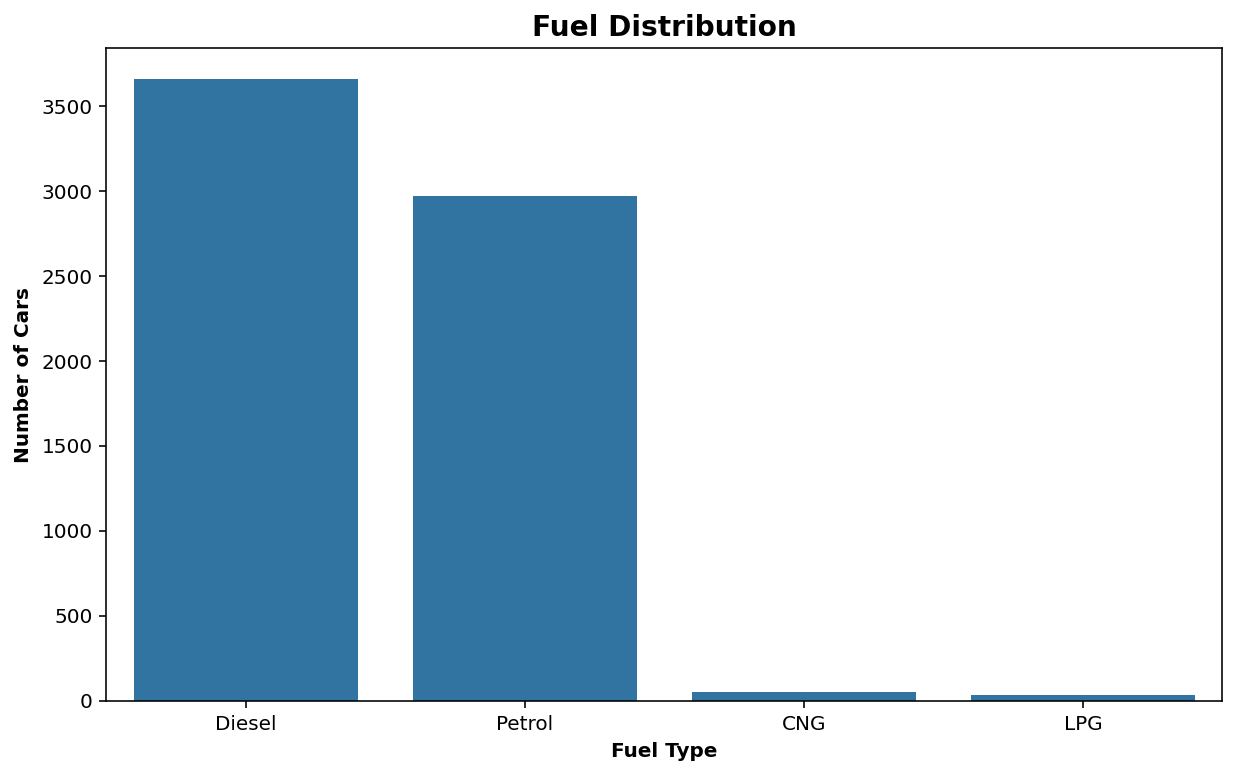

In [34]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.fuel.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `fuel`
sns.countplot(data=df_clean, x='fuel', order=order, color=color);
x_y_t('Fuel Type', 'Number of Cars', 'Fuel Distribution')

There are more diesel cars than petrol cars

### What is the distribution of Seller Type

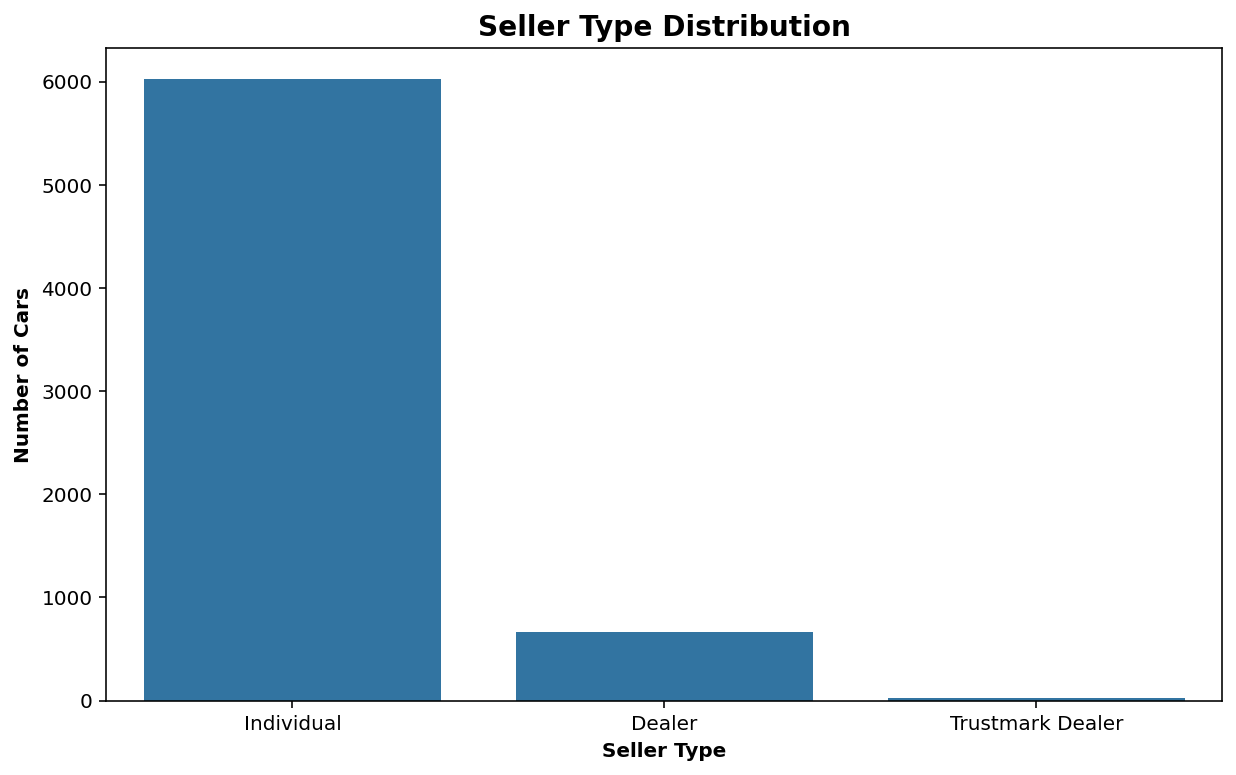

In [35]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.seller_type.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `seller_type`
sns.countplot(data=df_clean, x='seller_type', order=order, color=color);
x_y_t('Seller Type', 'Number of Cars', 'Seller Type Distribution')

There are more individual sellers than dealers and trustmark dealers

### What is the distribution of Transmission?

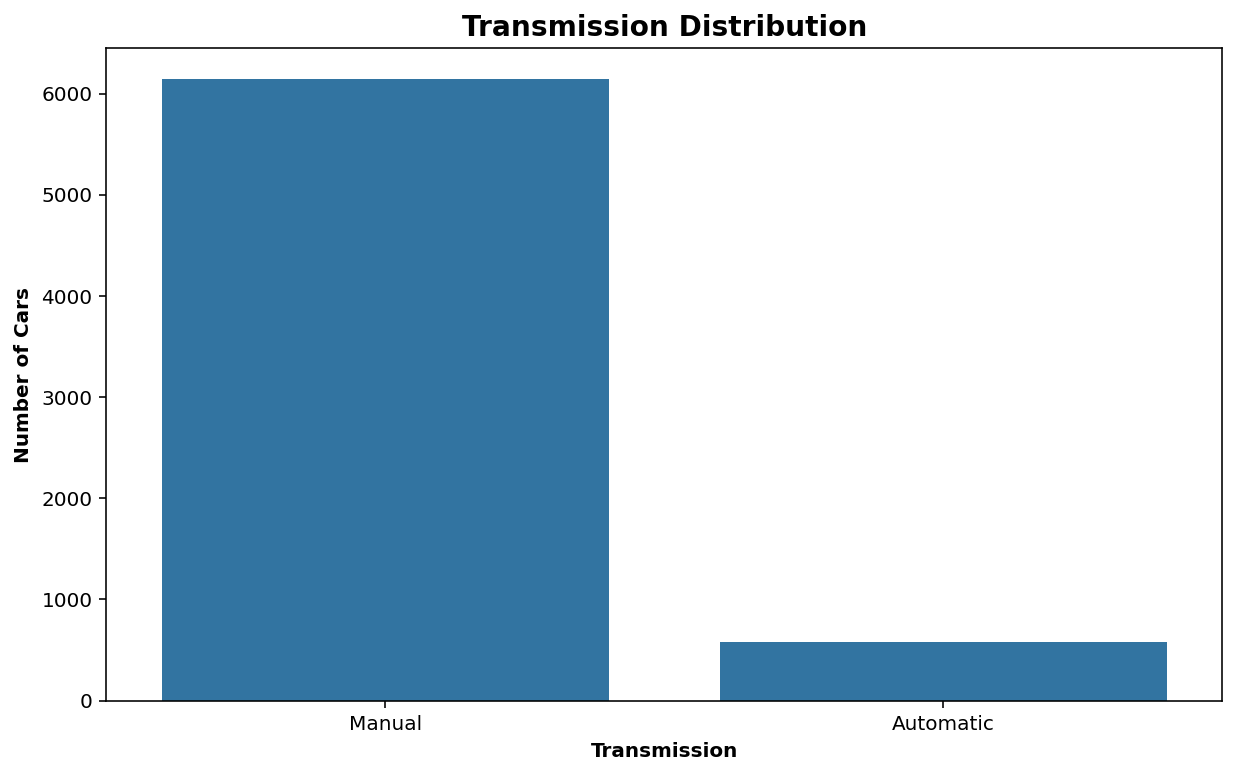

In [36]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.transmission.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `seller_type`
sns.countplot(data=df_clean, x='transmission', order=order, color=color);
x_y_t('Transmission', 'Number of Cars', 'Transmission Distribution')

Manual cars are more popular than automatic

### What is the distribution of Owners?

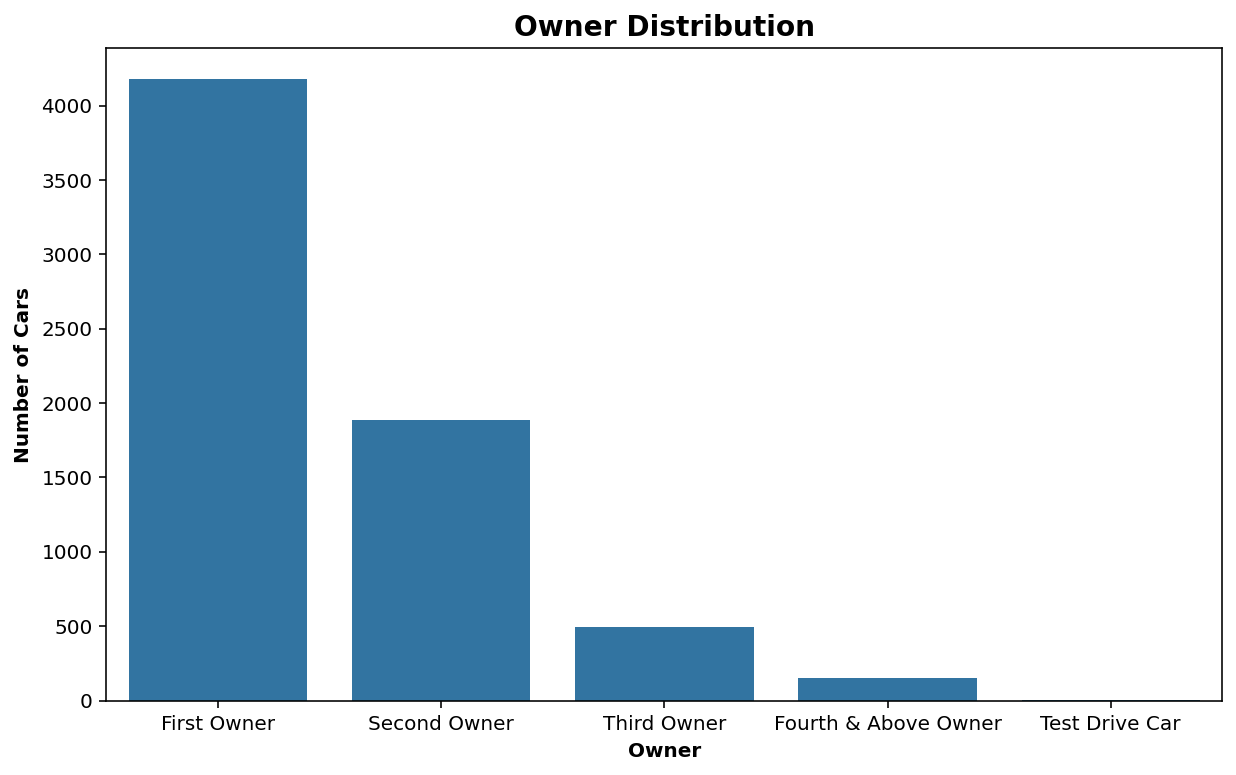

In [37]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.owner.value_counts().index

# Plot the bar chart in the decreasing order of the frequency of the `seller_type`
sns.countplot(data=df_clean, x='owner', order=order, color=color);
x_y_t('Owner', 'Number of Cars', 'Owner Distribution')

Most cars sold are first owner cars.

### what is the distribution of Price?

In [38]:
df_clean.selling_price.describe()

count       6717.0000
mean      526385.9970
std       523550.4483
min        29999.0000
25%       250000.0000
50%       420000.0000
75%       650000.0000
max     10000000.0000
Name: selling_price, dtype: float64

/Users/salman/opt/anaconda3/envs/udacity/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


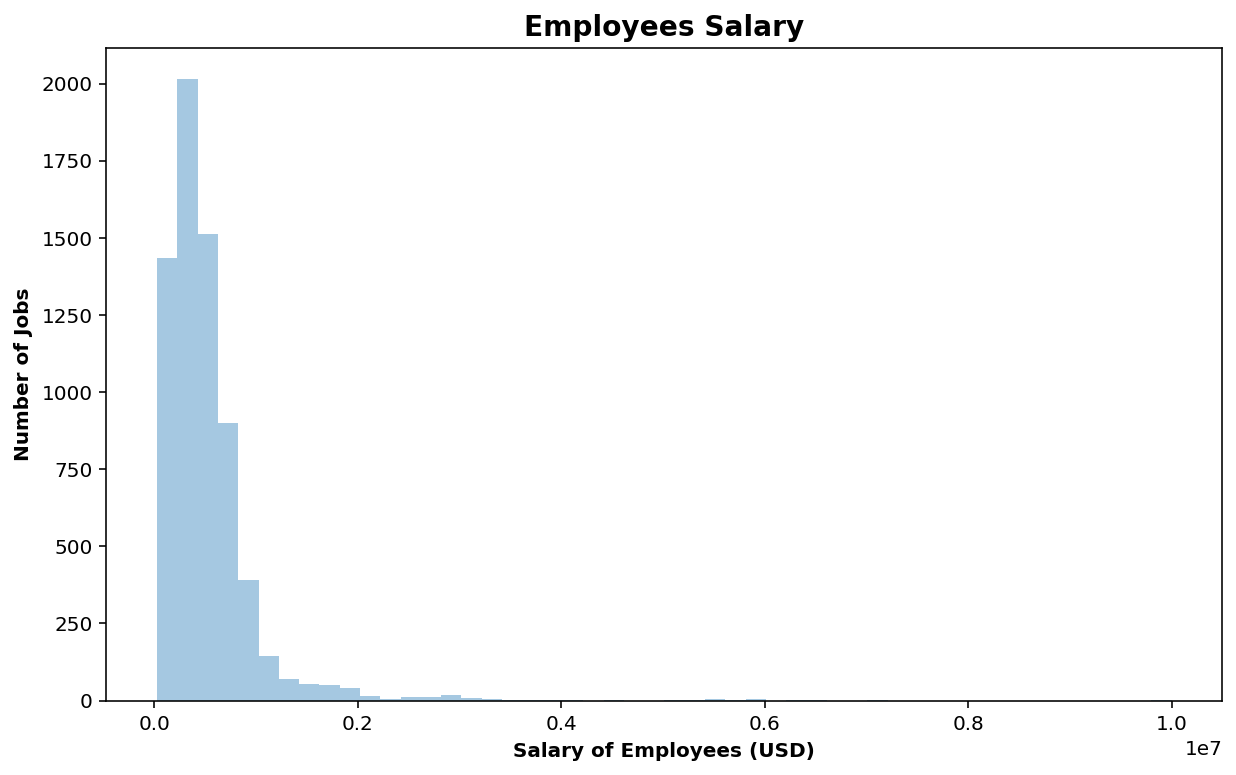

In [39]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
#Plot the distplot of salary_in_usd
sns.distplot(x = df_clean.selling_price, kde=False)
x_y_t('Salary of Employees (USD)', 'Number of Jobs', 'Employees Salary')

## Observation
<li> Most of the cars are diesel cars and petrol cars. 
<li> Most cars are sold by individuals.
<li> Majority of the cars are manual transmission cars
<li> Majority of cars sold are first owner cars

# Bivariate Exploration

In [40]:
df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4000,1248,74.0000,5.0000
1,Skoda Rapid 1.5,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1400,1498,103.5200,5.0000
2,Honda City 2017-2020,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7000,1497,78.0000,5.0000
3,Hyundai i20 Sportz,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0000,1396,90.0000,5.0000
4,Maruti Swift VXI,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1000,1298,88.2000,5.0000


## What is the relationship between Fuel and Price?

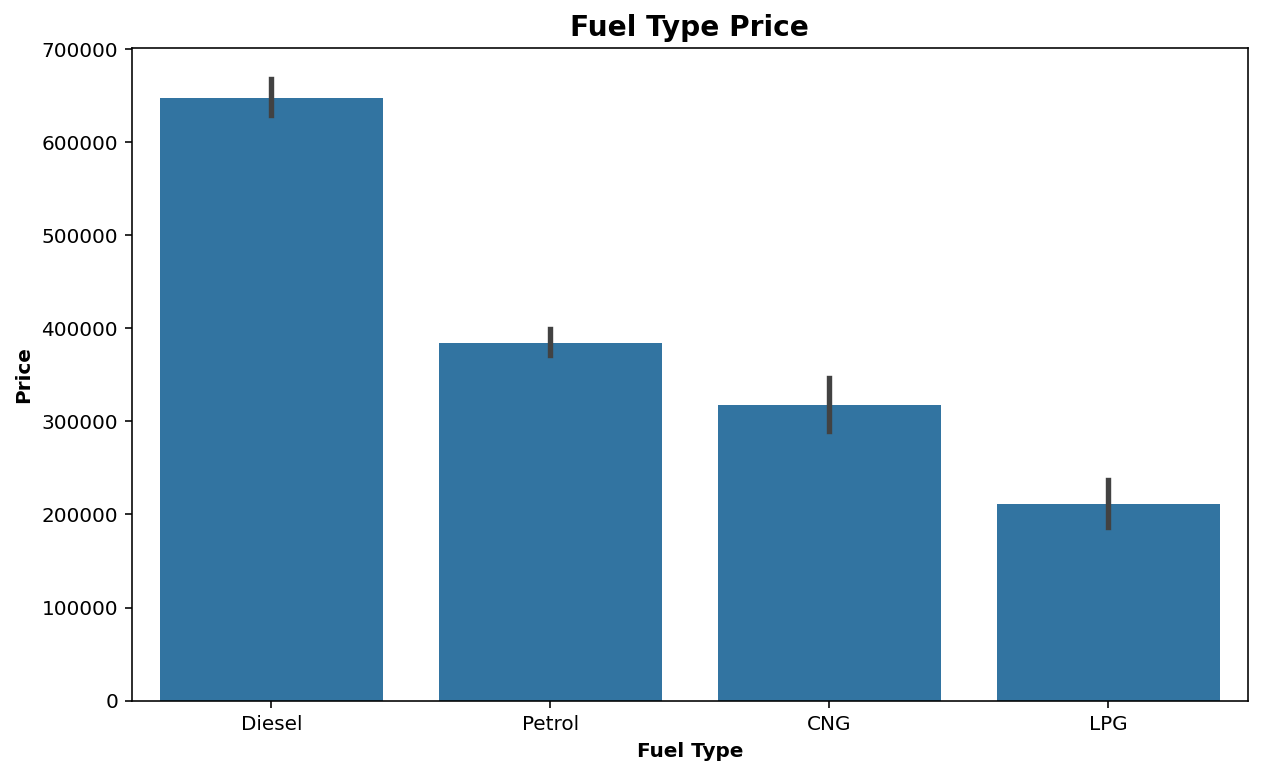

In [41]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.fuel.value_counts().index
# Plot the bar chart of `fuel` and 'selling_price'
sns.barplot(data=df_clean, x='fuel', y='selling_price', color=color, order=order);
#set the title and label
x_y_t('Fuel Type', 'Price', 'Fuel Type Price')

Cars that consume diesel are more expensive

## What is the relationship between Seller type and Price?

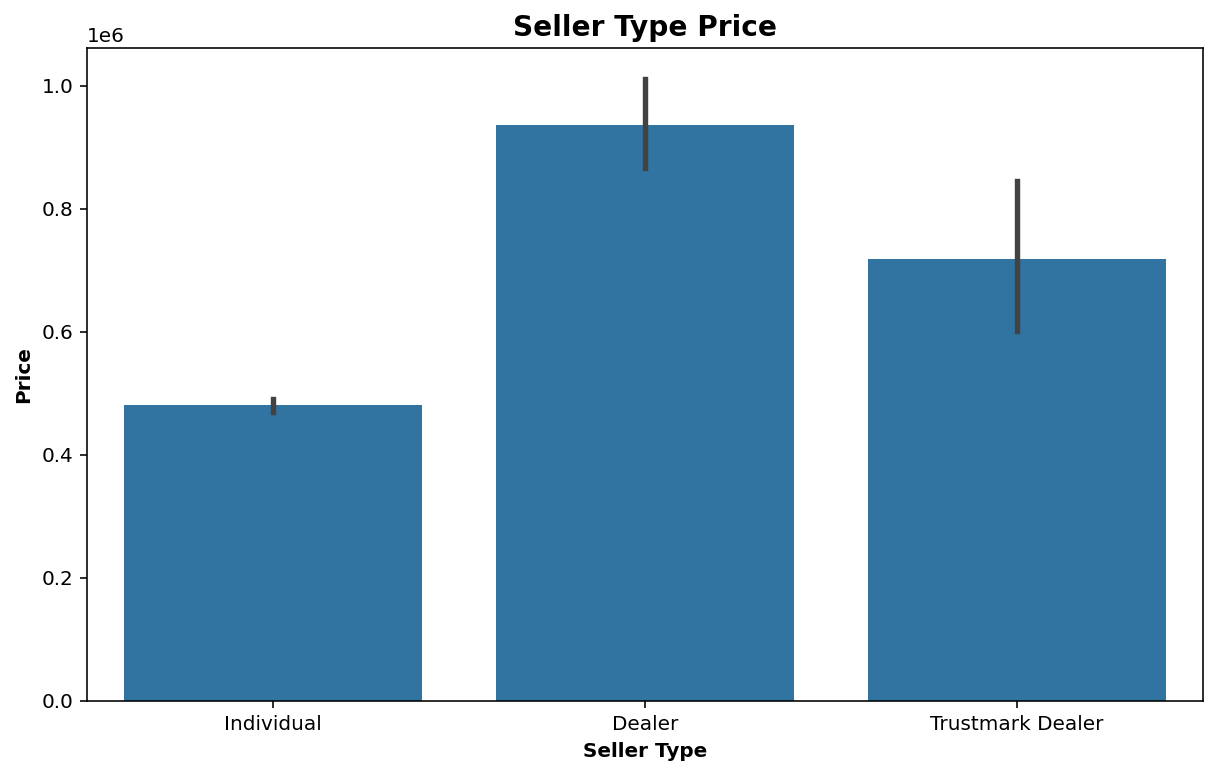

In [42]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.seller_type.value_counts().index
# Plot the bar chart of `seller_type` and 'selling_price'
sns.barplot(data=df_clean, x='seller_type', y='selling_price', color=color, order=order);
#set the title and label
x_y_t('Seller Type', 'Price', 'Seller Type Price')

Dealers sells more cars

## What is the relationship between Transmission and Price?

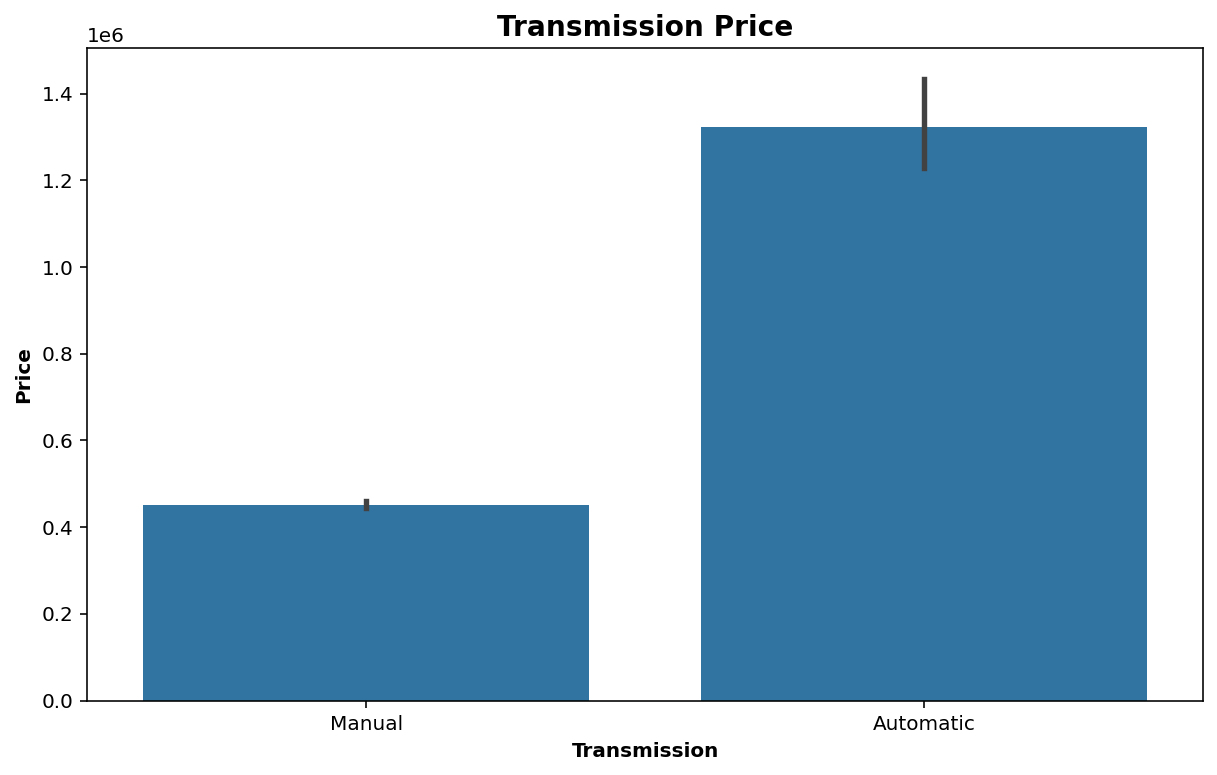

In [43]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.transmission.value_counts().index
# Plot the bar chart of `transmission` and 'selling_price'
sns.barplot(data=df_clean, x='transmission', y='selling_price', color=color, order=order);
#set the title and label
x_y_t('Transmission', 'Price', 'Transmission Price')

Automatic cars sell more than Manual cars

## What is the relationship between Owners and Price?

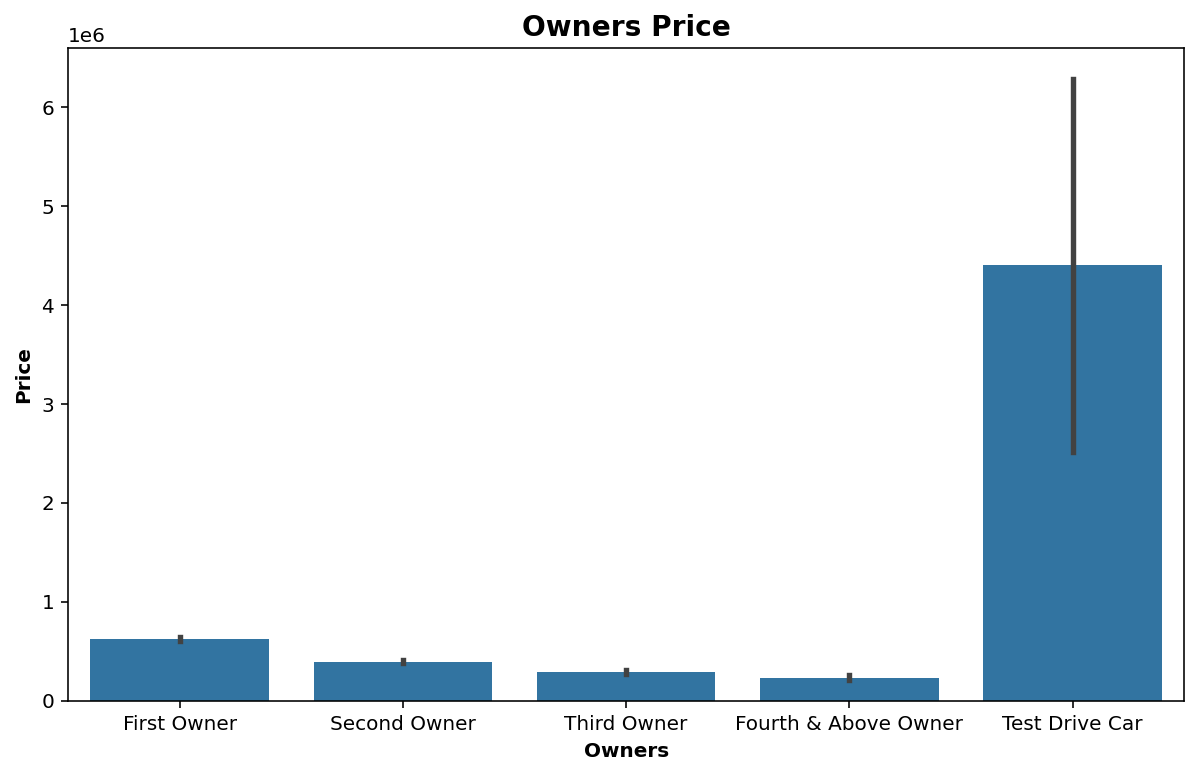

In [44]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.owner.value_counts().index
# Plot the bar chart of `owner` and 'selling_price'
sns.barplot(data=df_clean, x='owner', y='selling_price', color=color, order=order);
#set the title and label
x_y_t('Owners', 'Price', 'Owners Price')

First owner cars cost more than second and third owners cars.

## What is the relationship between Transmission and Mileage?

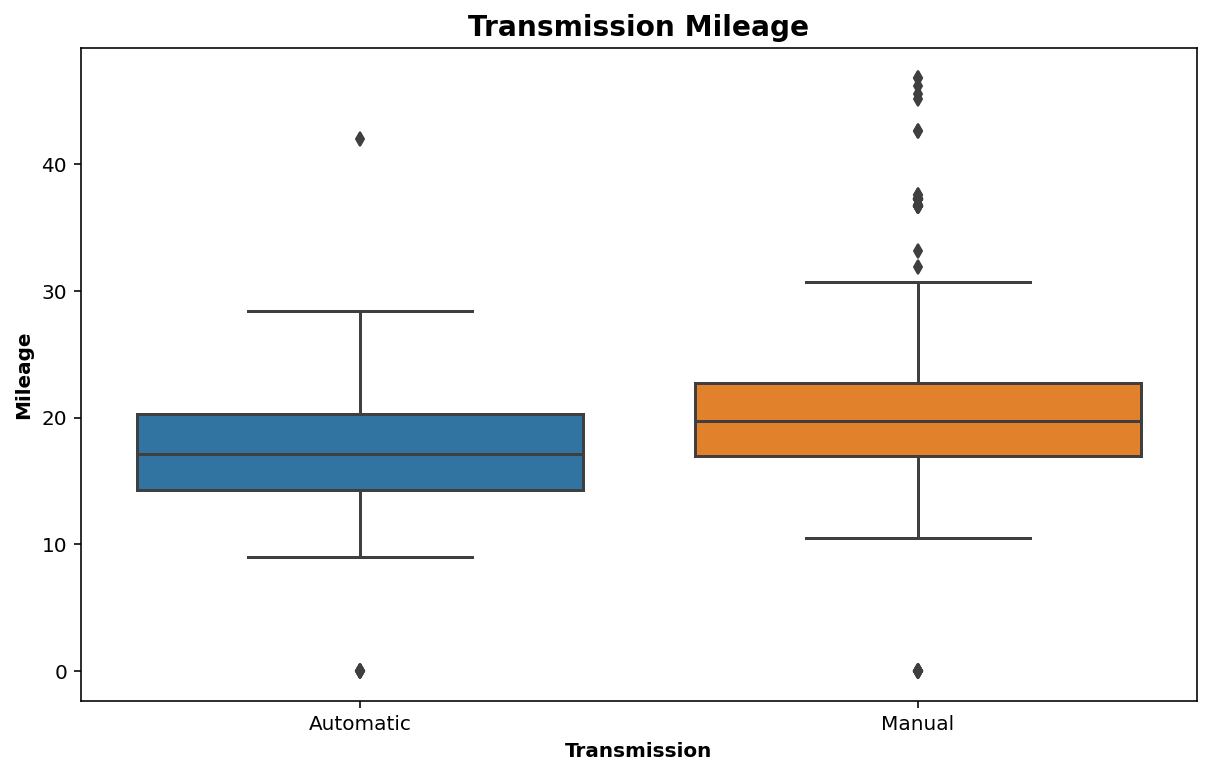

In [48]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])
sns.boxplot(x='transmission', y='mileage', data=df_clean)
#set the title and label
x_y_t('Transmission', 'Mileage', 'Transmission Mileage')

Manual cars have more mileage than Automatic cars but also have some outliers.

## What is the relationship between Fuel and Power?

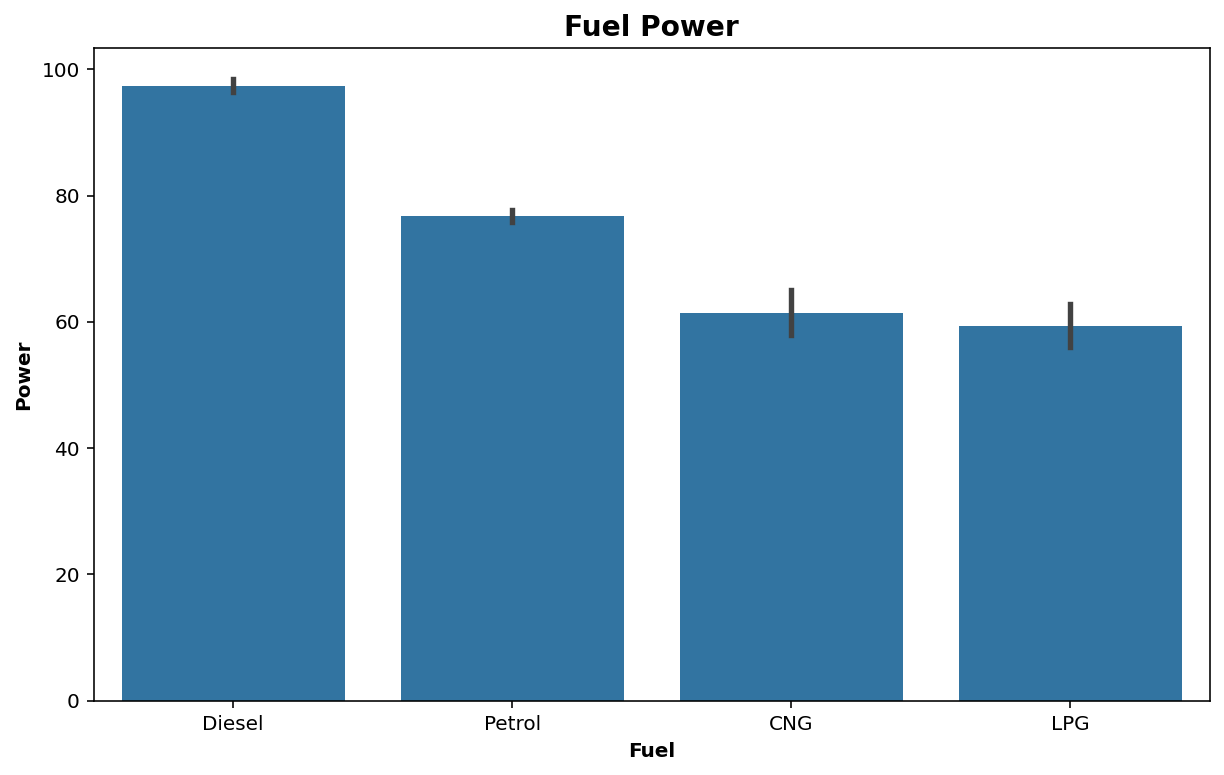

In [49]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.fuel.value_counts().index
# Plot the bar chart of `fuel` and 'max_power'
sns.barplot(data=df_clean, x='fuel', y='max_power', color=color, order=order);
#set the title and label
x_y_t('Fuel', 'Power', 'Fuel Power')

Diesel produce more power than petrol, CNG and LPG

## Observations
<li> Diesel cars are sold more than any other cars
<li> Dealers sells more cars than individuals. It makes sense since dealers have more access to customers than individuals
<li> Automatic cars are sold more than Manual cars which makes sense since people prefer driving automatic cars.
<li> First owners cars sells more than second and third since first owner are in better condition.
<li> Manual cars have more mileage than automatic which means manual cars are driven to a long distance. Automatic cars are mostly driven in the city that’s why they have less mileage compare to manual cars.
<li> Diesel cars produce more power than petrol and any other fuel type.

# Multivariate Exploration

In [50]:
df_clean.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4000,1248,74.0000,5.0000
1,Skoda Rapid 1.5,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.1400,1498,103.5200,5.0000
2,Honda City 2017-2020,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7000,1497,78.0000,5.0000
3,Hyundai i20 Sportz,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0000,1396,90.0000,5.0000
4,Maruti Swift VXI,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1000,1298,88.2000,5.0000


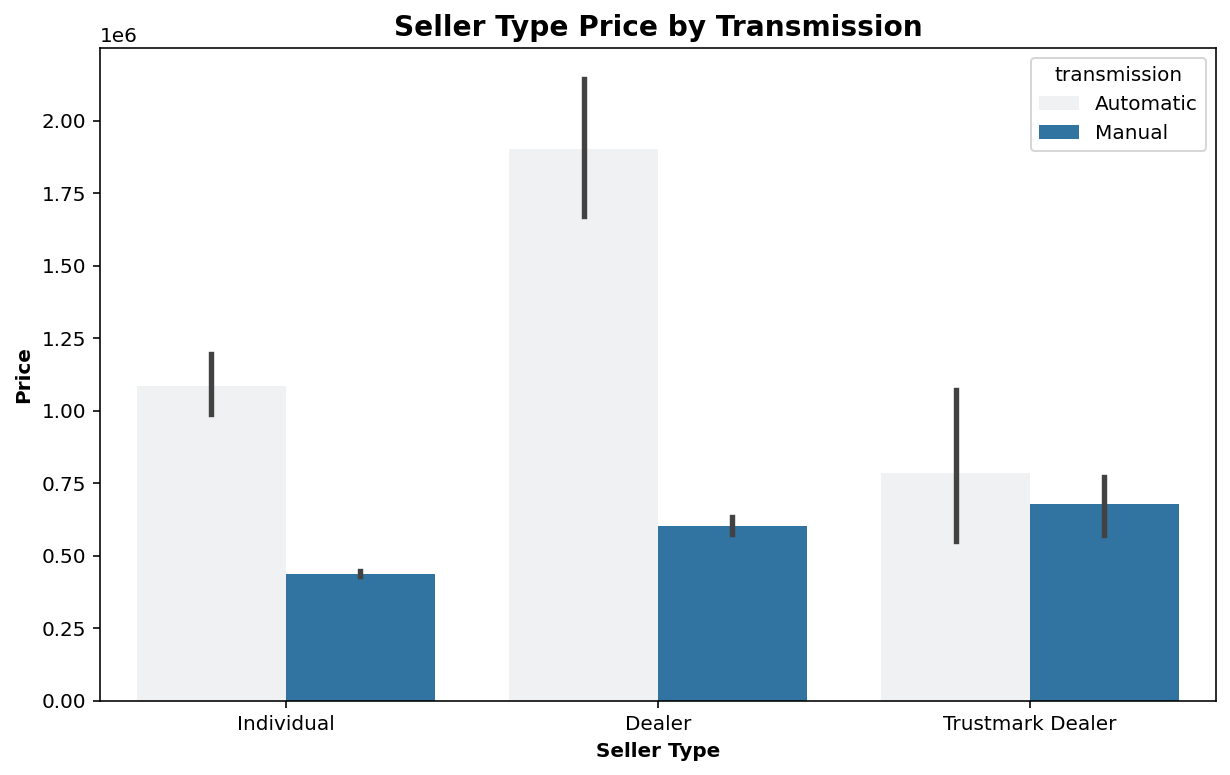

In [52]:
#Set a larger figure size for the plot
plt.figure(figsize=[10,6])

# Get the indexes of the Series
order = df_clean.seller_type.value_counts().index
# Plot the bar chart of `seller_type` and 'selling_price'
sns.barplot(data=df_clean, x='seller_type', y='selling_price', hue= 'transmission', color=color, order=order);
#set the title and label
x_y_t('Seller Type', 'Price', 'Seller Type Price by Transmission')

Dealers sells more automatic cars.

# Observations.
<li> Dealers and Individuals sells automatic cars than maunual cars.

# Linear Regression

In [56]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6717 entries, 0 to 8125
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   name           6717 non-null   object  
 1   year           6717 non-null   int64   
 2   selling_price  6717 non-null   int64   
 3   km_driven      6717 non-null   int64   
 4   fuel           6717 non-null   category
 5   seller_type    6717 non-null   category
 6   transmission   6717 non-null   category
 7   owner          6717 non-null   category
 8   mileage        6717 non-null   float64 
 9   engine         6717 non-null   int64   
 10  max_power      6717 non-null   float64 
 11  seats          6717 non-null   float64 
dtypes: category(4), float64(3), int64(4), object(1)
memory usage: 499.2+ KB


In [90]:
df_clean_cat = df_clean[['name','fuel','seller_type','transmission', 'owner']]

### Convert Categorical Columns into One-hot Vectors

In [91]:
from sklearn.preprocessing import OneHotEncoder

In [92]:
hot_encoder = OneHotEncoder()

In [93]:
df_clean_1hot = hot_encoder.fit_transform(df_clean_cat)

In [94]:
df_clean_1hot

<6717x678 sparse matrix of type '<class 'numpy.float64'>'
	with 33585 stored elements in Compressed Sparse Row format>

## Split the Dataset

In [95]:
X = df_clean_1hot
y = df_clean['selling_price']

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Model

In [98]:
from sklearn.linear_model import LinearRegression

In [99]:
lin_reg = LinearRegression()

In [100]:
lin_reg.fit(X_train,y_train)

LinearRegression()

## Predicting the Test Data

In [101]:
predictions = lin_reg.predict(X_test)

### Create a scatterplot of the real test values versus the predicted values

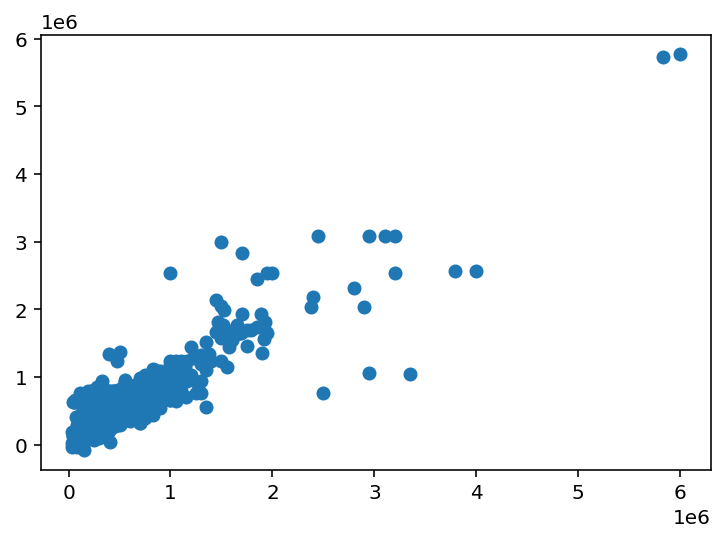

In [102]:
plt.scatter(y_test,predictions)

In [103]:
print("Predictions: ", predictions)

Predictions:  [555227.90474709 794368.82514811 144183.5476326  ... 322857.94412289
 942932.99626205 329036.57630147]


## Evaluating the Model

In [104]:
from sklearn import metrics

In [105]:
print('MAE ', metrics.mean_absolute_error(y_test,predictions))
print('MSE ', metrics.mean_squared_error(y_test,predictions))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE  121847.88245068149
MSE  44047133858.973236
RMSE  209874.09048992503


# Decision Tree Regression

In [106]:
from sklearn.tree import DecisionTreeRegressor

## Training the Model

In [107]:
tree_reg = DecisionTreeRegressor()

In [108]:
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

## Predicting the Model

In [109]:
tree_predictions = tree_reg.predict(X_test)

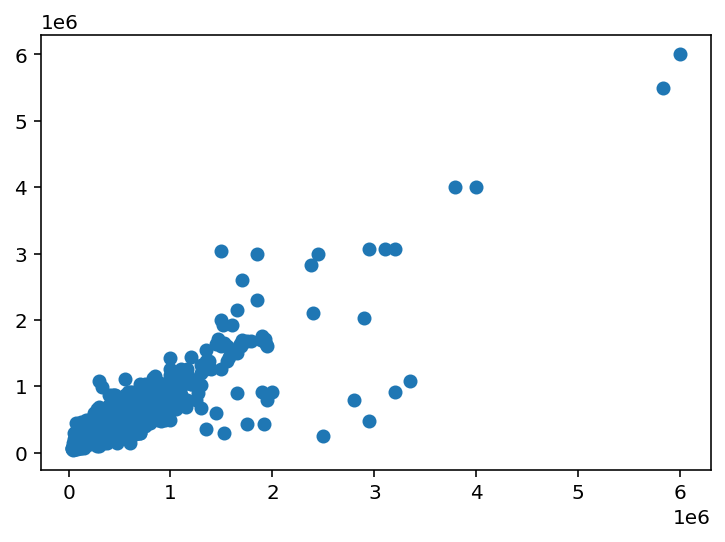

In [110]:
plt.scatter(y_test, tree_predictions)

## Evaluating the Model

In [111]:
print('MAE ', metrics.mean_absolute_error(y_test,tree_predictions))
print('MSE ', metrics.mean_squared_error(y_test,tree_predictions))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test, tree_predictions)))

MAE  120638.9652372807
MSE  51231190612.48515
RMSE  226343.08165368155


# Random Forest Regression

In [112]:
from sklearn.ensemble import RandomForestRegressor

## Training the Model

In [113]:
forest_reg = RandomForestRegressor()

In [114]:
forest_reg.fit(X_train,y_train)

RandomForestRegressor()

## Predicting the Model

In [115]:
forest_reg_pred = forest_reg.predict(X_test)

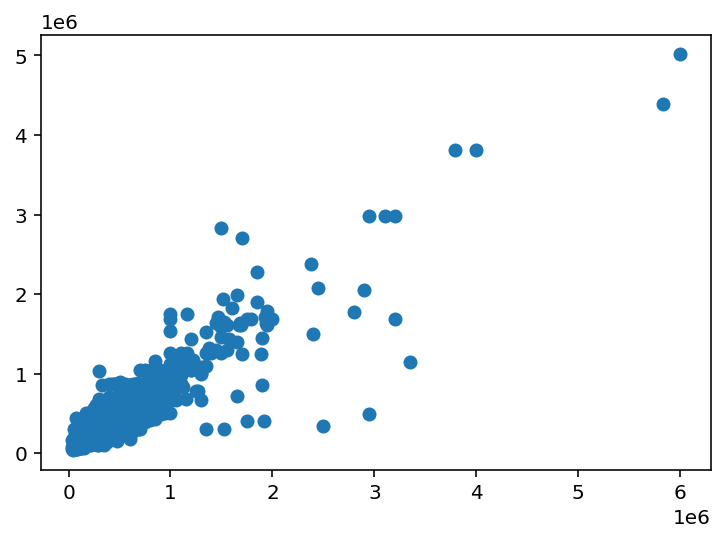

In [116]:
plt.scatter(y_test, forest_reg_pred)

## Evaluating the Model

In [117]:
print('MAE ', metrics.mean_absolute_error(y_test,forest_reg_pred))
print('MSE ', metrics.mean_squared_error(y_test,forest_reg_pred))
print('RMSE ', np.sqrt(metrics.mean_squared_error(y_test, forest_reg_pred)))

MAE  119678.67666386587
MSE  46338567100.52571
RMSE  215263.94751682342


# Observations
Of all the models used, linear regression performed better in term of RMSE <br>
Linear Regression: 209874.09048992503 <br>
Decision Tree Regression: 26343.08165368155 <br>
Random Forest Regression: 215263.94751682342 